In [1]:
import cv2 as cv
import numpy as np
from keras.preprocessing.image import img_to_array, array_to_img, load_img
import math
import matplotlib.pyplot as plt
from face_detectors import (
    CascadeXMLEnum,
    CascadeFaceDetector
)

Using TensorFlow backend.


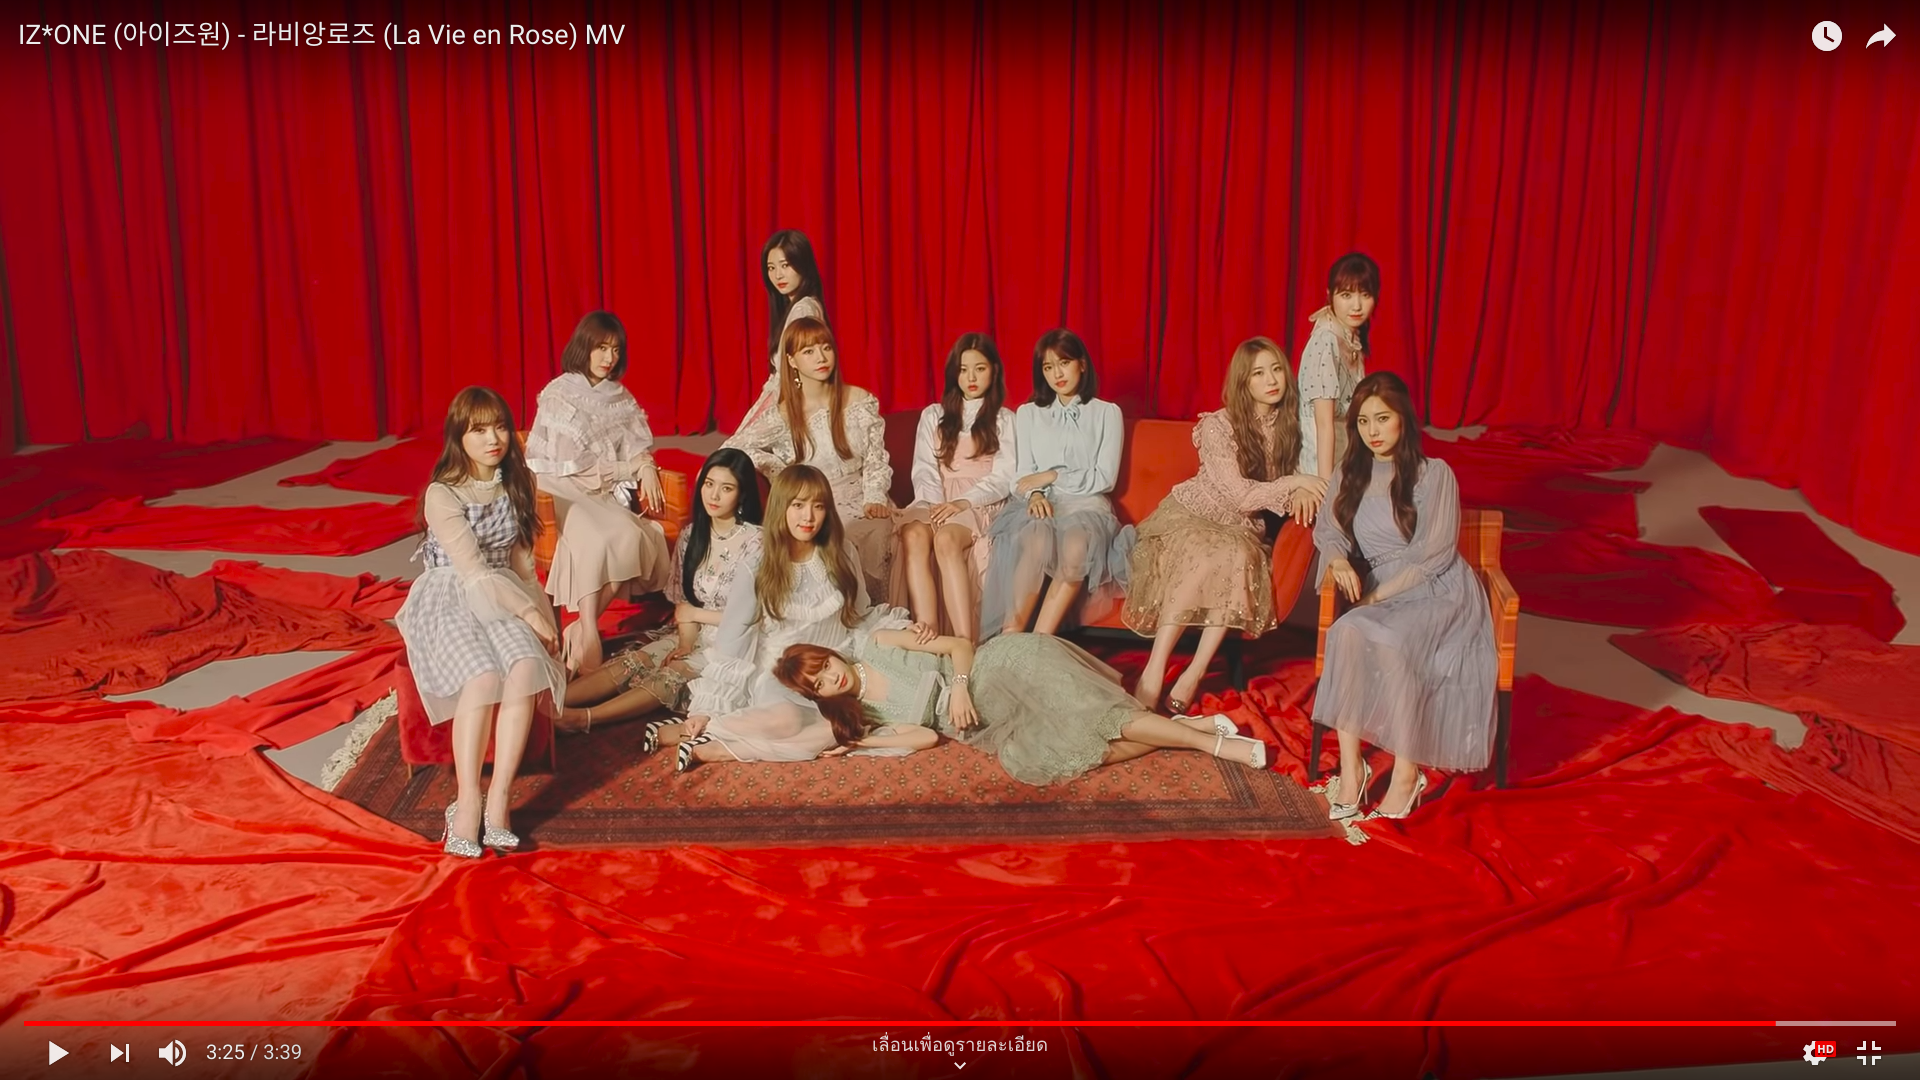

In [2]:
original_image = load_img('./data/test_images/Screenshot from 2019-01-26 00-07-26.png')
original_image

In [3]:
from utils import extract_objects

def plot_faces(image, faces=[], n_col=3, texts=[]):
    fig = plt.figure(figsize=(18, 12))
    cropped_faces = [ image[y: y + h, x : x + w] for (x, y, w, h) in faces ]
#     cropped_faces = extract_objects(image=image, bounding_boxes=faces)
    n_row = math.ceil(len(faces)/ n_col)
    fig.suptitle('Found %d faces' % len(faces))
    for i, image in enumerate(cropped_faces):
        ax = plt.subplot(n_row, n_col, i + 1)
        plt.imshow(image)
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.axis()
        try:
            ax.set_title(texts[i])
        except IndexError:
            pass

    plt.show()

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 10.3 µs


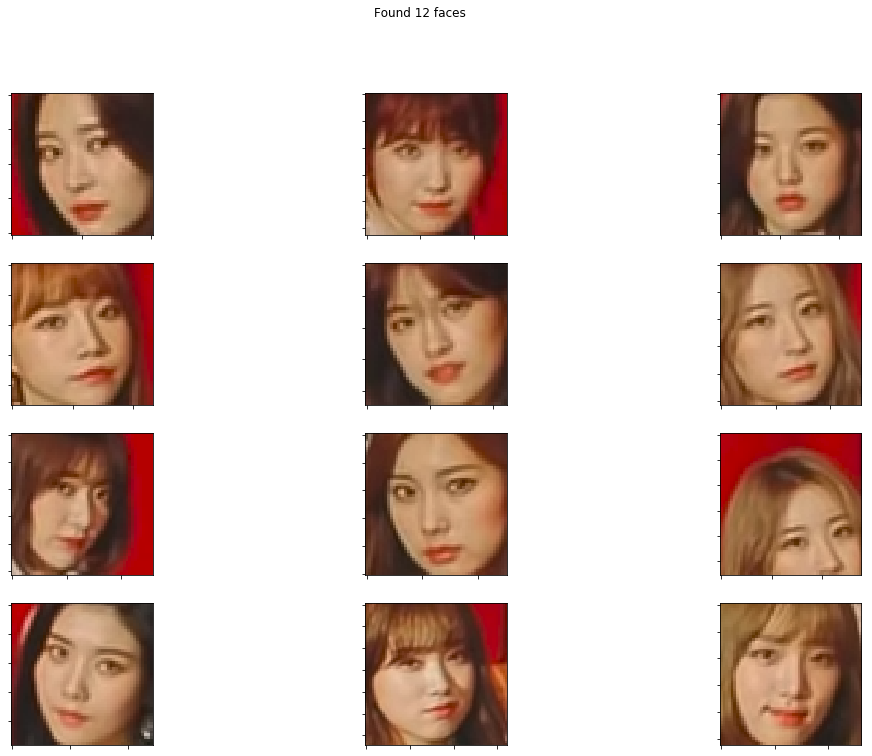

In [4]:
%time
image = img_to_array(original_image)
image = image.astype(np.uint8)

face_detector = CascadeFaceDetector(xml=CascadeXMLEnum.HAARCASCADE_FRONTALFACE_ALT.value)
faces = face_detector.detect(image=image)
face_images = extract_objects(image=image, bounding_boxes=faces)
plot_faces(image, faces)

In [5]:
from emotion_classifiers import BITBOTSEmotionClassifier

emotion_classifier = BITBOTSEmotionClassifier()

CPU times: user 7 µs, sys: 1e+03 ns, total: 8 µs
Wall time: 14.5 µs
12/12 [==============================] - 1s 121ms/step


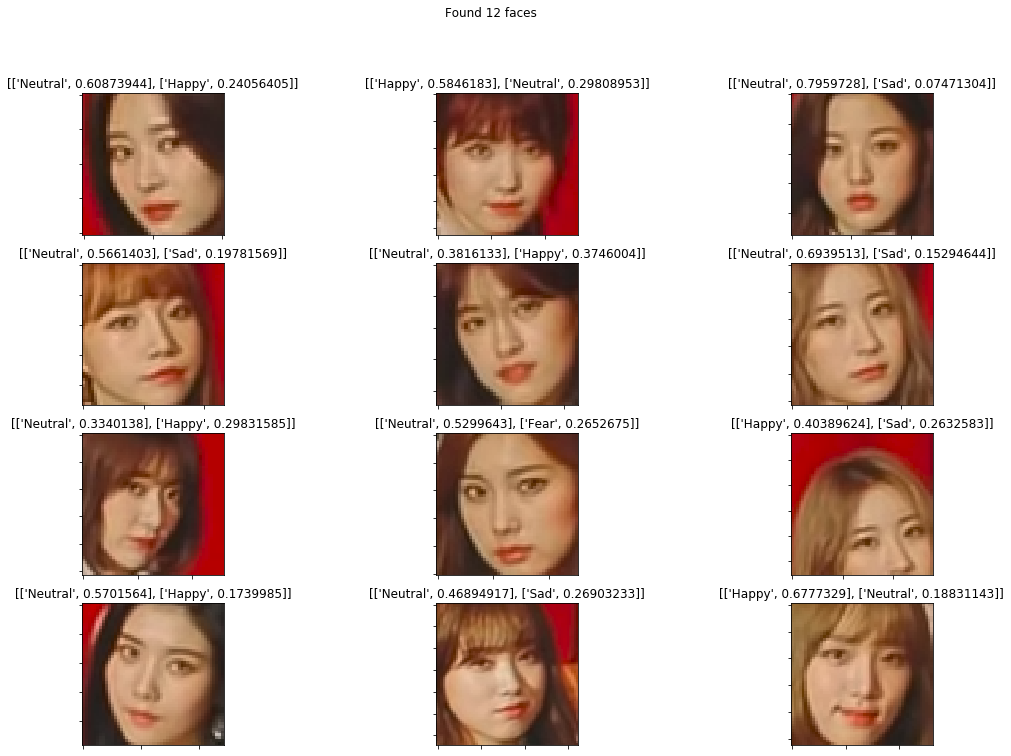

In [6]:
%time
results = emotion_classifier.predict(images=face_images, verbose=1)

plot_faces(image, faces=faces, texts=[ r[:2] for r in results ])